# Assignment 1 - Single View Geometry Part C

Team Ironix:
<br>
Iva Ilcheva - ilchei@usi.ch<br>
Reinard Lazuardi Kuwandy - kuwanr@usi.ch

### Required files
#### Please make sure these file are in the same folder as this notebook

* I1.jpg 
* I2.jpg
* utils.py

In [1]:
import time
import numpy as np
from numpy.linalg import svd
from PIL import Image
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
from utils import select_points, draw_line, imwarpLinear, bilinear_interpolate, create_A, homographyEstimation

In [3]:
import pprint
pp = pprint.PrettyPrinter()

### Load Image

In [4]:
imgI1 = plt.imread("I1.jpg")
imgI2 = plt.imread("I2.jpg")

## Points to estimate the homography matrix from images I1 (x1) and I2 (x2) ##

In [5]:
[a,b,c,d, center, e, f, g, h] = [[347.71621067, 448.69151994, 1.],
 [ 47.42361788, 516.83483907, 1.],
 [668.79829064, 459.08626354, 1.],
 [781.98549869, 549.17404137, 1.],
 [449.73725681, 702.43886351, 1.],
 [663.93570659, 626.22101022, 1.],
 [558.80763308, 611.76590011, 1.],
 [403.74372465, 613.08000103, 1.],
 [292.04514655, 627.53511113, 1.]]

x2 = [a,b,c,d]
x1 = [g, h, f, center]

## Plotting of the above said points ##

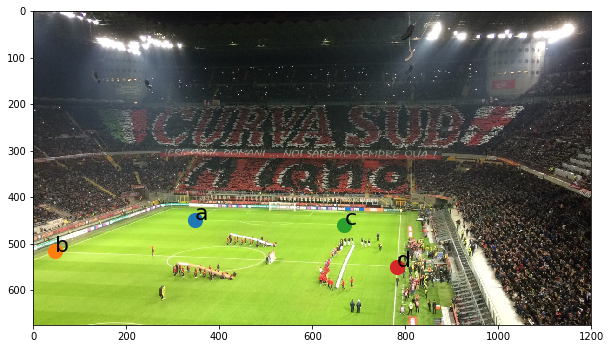

In [6]:
%matplotlib inline

plt.subplots(1, 1, figsize = (10, 10))
plt.rcParams.update({'font.size': 22})
plt.imshow(imgI2)
plt.scatter(a[0],a[1], s=200)
plt.annotate('a',(a[:2]) )
plt.scatter(b[0],b[1], s=200)
plt.annotate('b', b[:2])
plt.scatter(c[0],c[1], s=200)
plt.annotate('c', c[:2])
plt.scatter(d[0],d[1], s=200)
plt.annotate('d', d[:2])


plt.show()

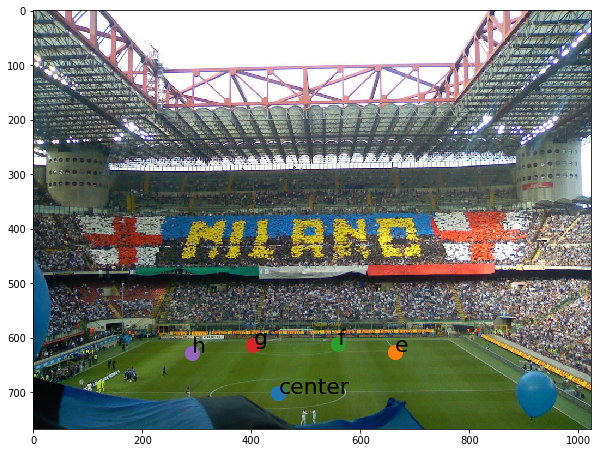

In [7]:
%matplotlib inline

plt.subplots(1, 1, figsize = (10, 10))
plt.rcParams.update({'font.size': 22})
plt.imshow(imgI1)
plt.scatter(center[0],center[1], s=200)
plt.annotate('center',(center[:2]) )
plt.scatter(e[0],e[1], s=200)
plt.annotate('e', e[:2])
plt.scatter(f[0],f[1], s=200)
plt.annotate('f', f[:2])
plt.scatter(g[0],g[1], s=200)
plt.annotate('g', g[:2])
plt.scatter(h[0],h[1], s=200)
plt.annotate('h', h[:2])

plt.show()

## Picking the corresponding points in image S (xP1 and xP2) ##

In [8]:
imgS = plt.imread("S.png")

In [9]:
[aP,bP,cP,dP,centerP,eP,fP] = [[213.87171801, 592.6296258, 1. ],
 [574.9633037,  729.13985942, 1.],
 [213.87171801, 188.97033285, 1.],
 [574.9633037,   49.52439529, 1.],
 [ 576.20584239,  390.44099379, 1.],
 [103.53401775, 481.31395993, 1.],
 [104.9767473,  298.08730731, 1.]]

xP2 = [aP,bP,cP,dP]
x1P = [eP,aP,fP,centerP]

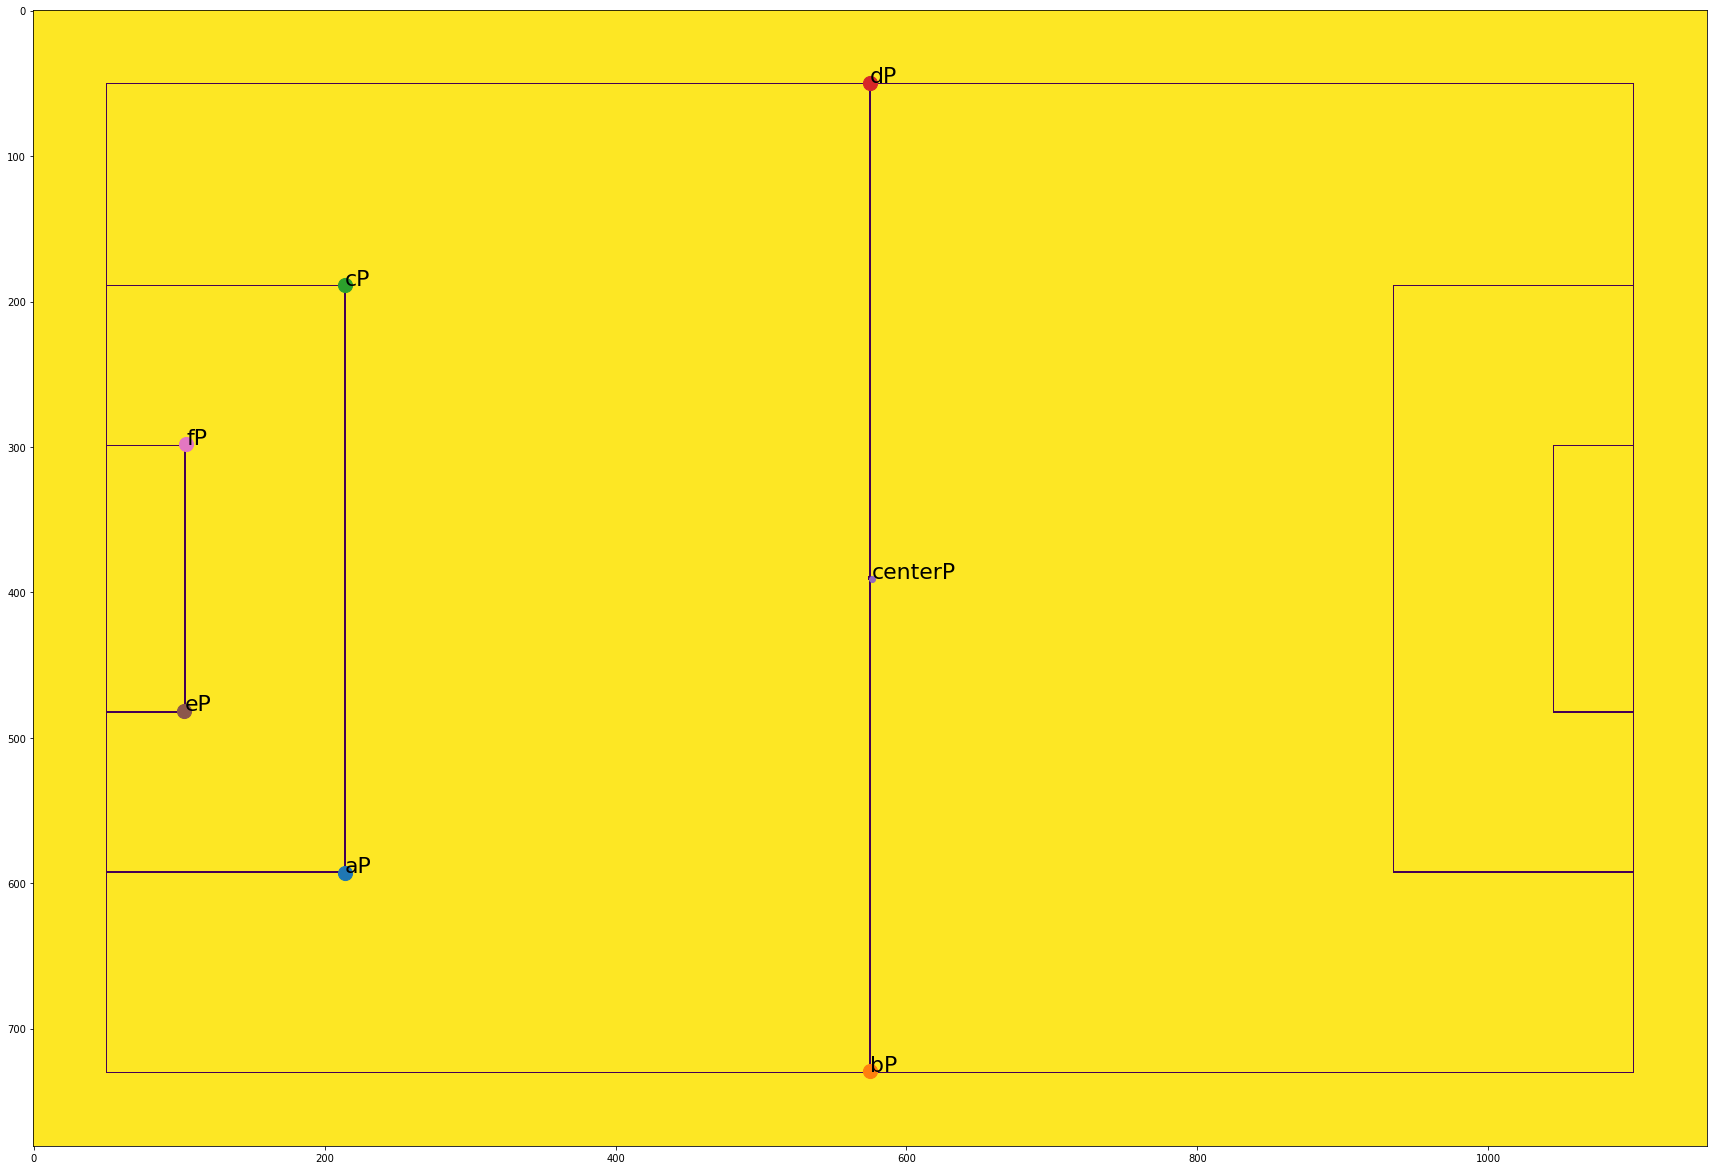

In [10]:
%matplotlib inline

plt.subplots(1, 1, figsize = (30, 30))
plt.rcParams.update({'font.size': 22})
plt.imshow(imgS)
plt.scatter(aP[0],aP[1], s=200)
plt.annotate('aP',(aP[:2]) )
plt.scatter(bP[0],bP[1], s=200)
plt.annotate('bP', bP[:2])
plt.scatter(cP[0],cP[1], s=200)
plt.annotate('cP', cP[:2])
plt.scatter(dP[0],dP[1], s=200)
plt.annotate('dP', dP[:2])
plt.scatter(centerP[0],centerP[1])
plt.annotate('centerP',(centerP[:2]) )
plt.scatter(eP[0],eP[1], s=200)
plt.annotate('eP', eP[:2])
plt.scatter(fP[0],fP[1], s=200)
plt.annotate('fP', fP[:2])

plt.show()

## Estimating the homography matrix H2 for image I2 through points x2 and xP2 ##

In [11]:
H2 = homographyEstimation(x2,xP2)
print("H2 :")
pp.pprint(H2)

H2 :
array([[ 1.71452740e-01, -6.09046130e+00,  2.49350566e+03],
       [ 1.03785363e+00, -1.47002840e-01, -7.92627460e+02],
       [ 1.28079731e-05, -4.11035863e-03,  1.00000000e+00]])


## Warping image I1, using the computed H homography matrix ##

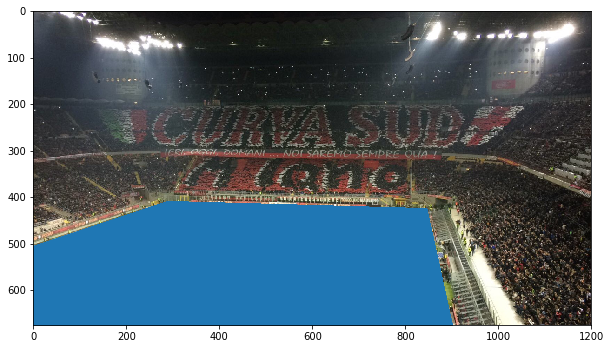

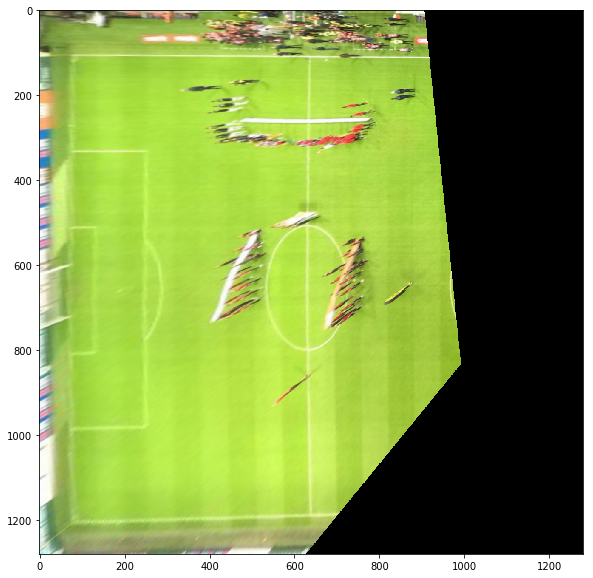

In [12]:
%matplotlib inline

plt.subplots(1, 1, figsize = (10, 10))
J = imwarpLinear(imgI2, H2, [-25, -20, 1180, 785], step = 1280)
plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(J, cmap = 'gray')

## Estimating the homography matrix H1 for image I1 through points x1 and xP1 ##

In [13]:
H1 = homographyEstimation(x1,x1P)
print("H1 :")
pp.pprint(H1)

H1 :
array([[-2.88829734e-02, -2.55545016e+00,  1.55117193e+03],
       [ 2.90882647e-01, -6.83250510e-01,  1.75067256e+02],
       [-6.26713503e-05, -2.01811414e-03,  1.00000000e+00]])


## Warping image I1, using the computed H1 homography matrix ##

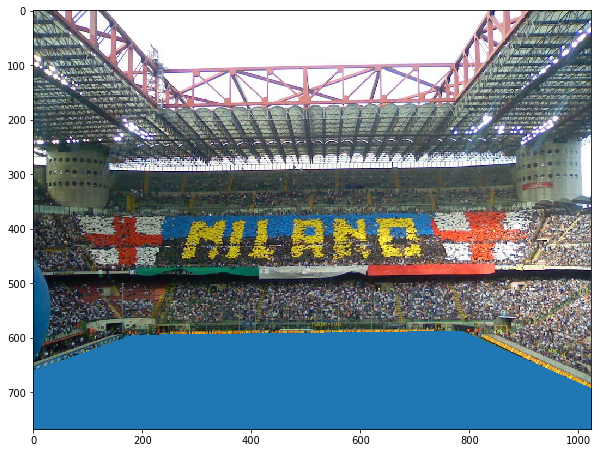

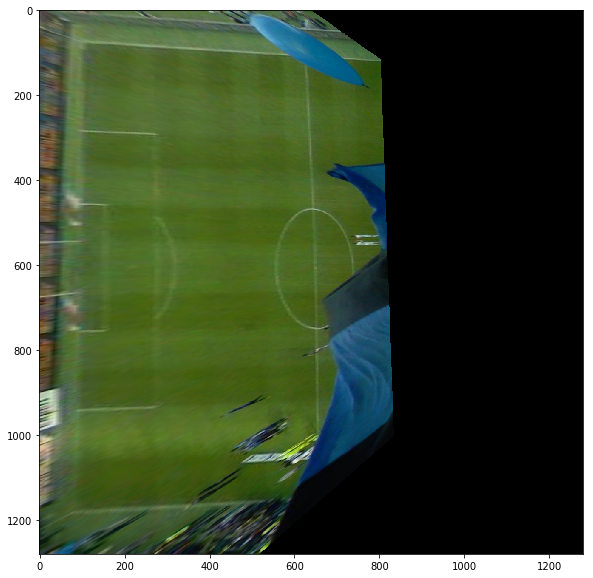

In [14]:
%matplotlib inline

plt.subplots(1, 1, figsize = (10, 10))
J1 = imwarpLinear(imgI1, H1, [-50, 12, 1170, 810], step = 1280)
plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(J1, cmap = 'gray')

### Preparing <b>left puzzle piece</b> of the final stitching ###

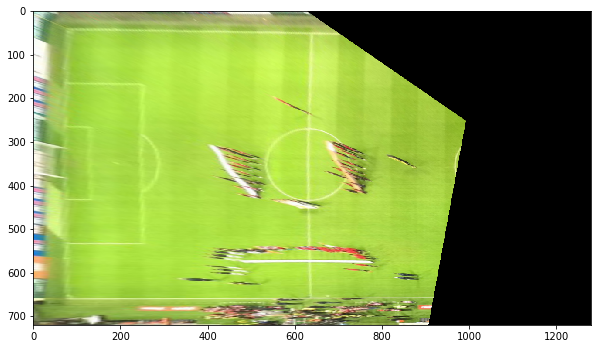

In [15]:
# Resizing image to desired 1280x720
J_resized = Image.fromarray(J.astype(np.uint8)).resize((1280, 720))

# Rotating the image by -180 degrees to fit final desired output puzzle piece
J_resized_and_rotated = np.fliplr(np.rot90(np.asarray(J_resized), 2))
plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(J_resized_and_rotated, cmap = 'gray')
plt.imsave('left_piece.png', J_resized_and_rotated)

### Preparing <b>right puzzle piece</b> of the final stitching ###

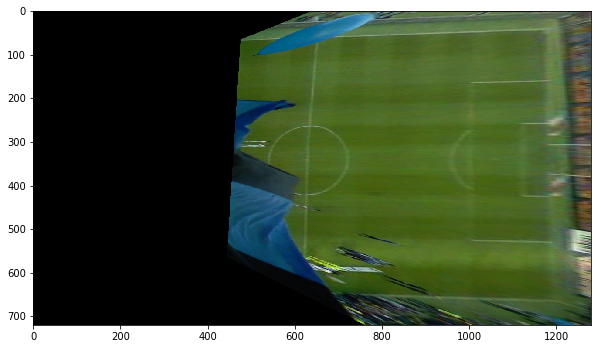

In [16]:
# Flipping the image by to fit final desired output puzzle piece
J1_flipped = np.fliplr(J1).astype(np.uint8)

# Resizing image to desired 1280x720
J1_flipped_and_resized = Image.fromarray(J1_flipped).resize((1280, 720))

plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(J1_flipped_and_resized, cmap = 'gray')
plt.imsave('right_piece.png', np.asarray(J1_flipped_and_resized))

# Stitching the pitch #

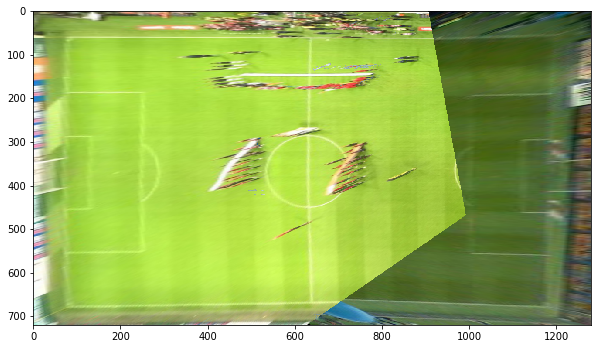

In [17]:
imag1 = Image.open("left_piece.png")
imag2 = Image.open("right_piece.png")
img_shapes = np.asarray(imag1).shape

#Converting the image to RGB
imag1 = imag1.convert('RGB')
imag2 = imag2.convert('RGB')

# Comparing the amount of brightness in each image and picking 
# the pixels containing higher amount of light to
# include in the final output
final_output = []
for i in range(img_shapes[1]):
    output = []
    for j in range(img_shapes[0]):
        pixelRGB1 = imag1.getpixel((i,j))
        R1, B1, G1 = pixelRGB1
        pixelRGB2 = imag2.getpixel((i,j))
        R2, B2, G2 = pixelRGB2
        if sum([R1, B1, G1])/3 > sum([R2, B2, G2])/3:
            output.append(pixelRGB1)
        else:
            output.append(pixelRGB2)
    final_output.append(output)
            
        
final_output_rotated = Image.fromarray(np.rot90(np.asarray(final_output)).astype(np.uint8)).resize((1280, 720))
plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(final_output_rotated, cmap = 'gray')
plt.imsave('stitched_pitch.png', np.asarray(final_output_rotated))